In [36]:
 # Pandas
import pandas as pd
from pathlib import Path
Path('my_data.db').touch()
from pprint import pprint

# SQL Alchemy
from sqlalchemy import create_engine

database_path = "Hotel Reservations.csv"

In [61]:
#Create Directory for saving images
import os
newpath = r'Optimization_Charts' 
if not os.path.exists(newpath):
    os.makedirs(newpath)

In [37]:
# Import sqlite and connect to engine
import sqlite3
conn = sqlite3.connect('my_data_hotel.db')
c = conn.cursor()

In [38]:
#Create database scheme 
c.execute('''CREATE TABLE IF NOT EXISTS reservations (booking_id text, no_of_adults int, no_of_children int,
                                        no_of_weekend_nights int, no_of_week_nights int, type_of_meal_plan text, 
                                        required_car_parking_space int, room_type_reserved text, lead_time text,
                                        arrival_year int, arrival_month int, arrival_date int, market_segment_type text,
                                        repeated_guest int, no_of_previous_cancellations int, no_of_previous_bookings_not_canceled int,
                                        avg_price_per_room int, no_of_special_requests int, booking_status text)''')

In [39]:
# Read in csv file and convert to sqlite database
reservations = pd.read_csv('Hotel Reservations.csv')
reservations.to_sql('reservations', conn, if_exists='replace', index=False)

36275

In [40]:
#Read data into dataframe
data = pd.read_sql("SELECT * FROM reservations", conn)

In [41]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [42]:
#select tables needed for analysis
# The column booking_id was removed as it contained unique ID numbers for each booking, which is not a relevant value for our features
# The arrival_year and arrival_date columns were also removed as they were not useful datapoints for our analysis.  The arrival_month column was preserved as seasonal bookings seemed a more relevant data point.
data_clean = pd.read_sql("SELECT no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, type_of_meal_plan, required_car_parking_space, room_type_reserved, lead_time, arrival_month, market_segment_type, repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, avg_price_per_room, no_of_special_requests, booking_status FROM reservations", conn)
data_clean.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,10,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,11,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,5,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,4,Online,0,0,0,94.50,0,Canceled


In [43]:
len(data_clean)

36275

In [44]:
#Check for missing values
data_clean.apply(pd.isnull).sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_month                           0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [45]:
#Check target variable counts
data_clean['booking_status'].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

In [46]:
#Check data types
data_clean.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_month                             int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [47]:
#Convert lead_time to integer
data_clean['lead_time'] = data_clean['lead_time'].astype('int64')

In [48]:
#Check that it was successfully changed
data_clean.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_month                             int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [49]:
# Define the features as X and target as y
X= data_clean.drop(columns='booking_status')
y = data_clean['booking_status']

In [50]:
#Encode categorical variables using get dummies
X = pd.get_dummies(X)
X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_month,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,10,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,5,11,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,5,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,48,4,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [51]:
#Import scikit learn modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [52]:
# Split dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [53]:
#Check shape of X_train
X_train.shape

(27206, 28)

In [54]:
#Check shape of X_test
X_test.shape

(9069, 28)

In [55]:
#Use standard scaler to scale train and test data (leverging 20.2 homework as guide)
scaler = StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)

X_test_scaled = X_scaler.transform(X_test)

## Nearest Neighbor

In [56]:
#Create a function that instantiates a KNN model and passes through n_neighbor as N
n_neighbors = [5,4,3,2,1]
def neighbors(N):
    knn = KNeighborsClassifier(n_neighbors=N)
    knn.fit(X_train_scaled,y_train)
    predictions = knn.predict(X_test_scaled)
    accuracy = balanced_accuracy_score(y_test,predictions)
    print(f"N_Neighbors = {N}")
    print(f"Balanced Accuracy Score: {accuracy}")
    print(classification_report(y_test,predictions))
    print("_________________________________________\n")
    matrix = confusion_matrix(y_test,predictions)
    matrix_df = pd.DataFrame(matrix,index = ['Actual Canceled','Actual Not Canceled'],columns=['Predicted Canceled','Predicted Not Canceled'])
    return matrix_df,accuracy
#create empty dictionary and then loop through list of n_neighbor values.  Append accuracy to dictionary.
optimization = {}
for i in n_neighbors:
    matrix_df,accuracy = neighbors(i)
    optimization[str(i)]=accuracy

    


N_Neighbors = 5
Balanced Accuracy Score: 0.8285399122322231
              precision    recall  f1-score   support

    Canceled       0.79      0.75      0.77      2958
Not_Canceled       0.88      0.91      0.89      6111

    accuracy                           0.86      9069
   macro avg       0.84      0.83      0.83      9069
weighted avg       0.85      0.86      0.85      9069

_________________________________________

N_Neighbors = 4
Balanced Accuracy Score: 0.8380245213383375
              precision    recall  f1-score   support

    Canceled       0.74      0.82      0.78      2958
Not_Canceled       0.91      0.86      0.88      6111

    accuracy                           0.85      9069
   macro avg       0.82      0.84      0.83      9069
weighted avg       0.85      0.85      0.85      9069

_________________________________________

N_Neighbors = 3
Balanced Accuracy Score: 0.8320950017641848
              precision    recall  f1-score   support

    Canceled       0.80  

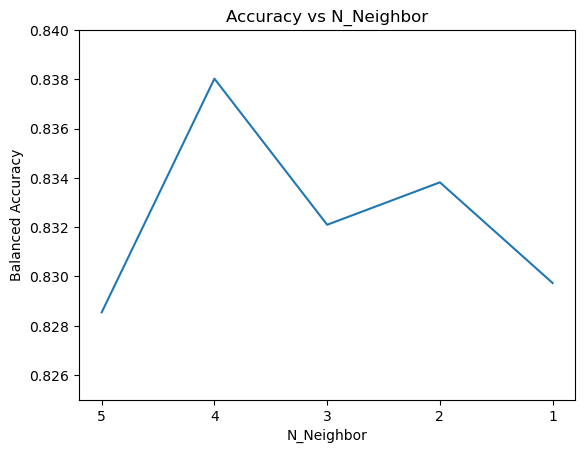

In [62]:
#Plot accuracy scores for each value of n_neighbor
import matplotlib.pyplot as plt
x_values = list(optimization.keys())
y_values = list(optimization.values())
xticks = x_values
plt.plot(x_values,y_values)
plt.ylabel('Balanced Accuracy')
plt.xlabel('N_Neighbor')
plt.ylim(.825,.84)
plt.title('Accuracy vs N_Neighbor')
plt.xticks(xticks)
plt.savefig('Optimization_Charts/Nearest_Neighbor.png')
plt.show()



In [63]:
#Attempt with n_neighbors = 5
neighbors(5)

N_Neighbors = 5
Balanced Accuracy Score: 0.8285399122322231
              precision    recall  f1-score   support

    Canceled       0.79      0.75      0.77      2958
Not_Canceled       0.88      0.91      0.89      6111

    accuracy                           0.86      9069
   macro avg       0.84      0.83      0.83      9069
weighted avg       0.85      0.86      0.85      9069

_________________________________________



(                     Predicted Canceled  Predicted Not Canceled
 Actual Canceled                    2221                     737
 Actual Not Canceled                 573                    5538,
 0.8285399122322231)

In [64]:
#Attempt with n_neighbors = 4
neighbors(4)

N_Neighbors = 4
Balanced Accuracy Score: 0.8380245213383375
              precision    recall  f1-score   support

    Canceled       0.74      0.82      0.78      2958
Not_Canceled       0.91      0.86      0.88      6111

    accuracy                           0.85      9069
   macro avg       0.82      0.84      0.83      9069
weighted avg       0.85      0.85      0.85      9069

_________________________________________



(                     Predicted Canceled  Predicted Not Canceled
 Actual Canceled                    2417                     541
 Actual Not Canceled                 862                    5249,
 0.8380245213383375)

In [65]:
#Attempt with n_neighbors = 3
neighbors(3)

N_Neighbors = 3
Balanced Accuracy Score: 0.8320950017641848
              precision    recall  f1-score   support

    Canceled       0.80      0.76      0.78      2958
Not_Canceled       0.89      0.91      0.90      6111

    accuracy                           0.86      9069
   macro avg       0.84      0.83      0.84      9069
weighted avg       0.86      0.86      0.86      9069

_________________________________________



(                     Predicted Canceled  Predicted Not Canceled
 Actual Canceled                    2243                     715
 Actual Not Canceled                 575                    5536,
 0.8320950017641848)

In [66]:
#Attempt with n_neighbors = 2
neighbors(2)

N_Neighbors = 2
Balanced Accuracy Score: 0.8338165340789712
              precision    recall  f1-score   support

    Canceled       0.68      0.86      0.76      2958
Not_Canceled       0.92      0.81      0.86      6111

    accuracy                           0.82      9069
   macro avg       0.80      0.83      0.81      9069
weighted avg       0.84      0.82      0.83      9069

_________________________________________



(                     Predicted Canceled  Predicted Not Canceled
 Actual Canceled                    2547                     411
 Actual Not Canceled                1182                    4929,
 0.8338165340789712)

In [67]:
#Attempt with n_neighbors = 1
neighbors(1)

N_Neighbors = 1
Balanced Accuracy Score: 0.8297311933423683
              precision    recall  f1-score   support

    Canceled       0.77      0.77      0.77      2958
Not_Canceled       0.89      0.89      0.89      6111

    accuracy                           0.85      9069
   macro avg       0.83      0.83      0.83      9069
weighted avg       0.85      0.85      0.85      9069

_________________________________________



(                     Predicted Canceled  Predicted Not Canceled
 Actual Canceled                    2275                     683
 Actual Not Canceled                 670                    5441,
 0.8297311933423683)

## Random Forest

In [68]:
#Create function for random forest, passing in estimator number
estimators = [100,200,300,400,500]
def forest(estimator):
    rf_model = RandomForestClassifier(n_estimators = estimator,random_state=0)
    rf_model = rf_model.fit(X_train_scaled, y_train)
    predictions = rf_model.predict(X_test_scaled)
    accuracy = balanced_accuracy_score(y_test,predictions)
    print(f"Estimators = {estimator}\n")
    print(f"Balanced Accuracy Score: {accuracy}")
    print("_________________________________________\n")
    print("Classification Report:")
    print(classification_report(y_test,predictions))
    importances = rf_model.feature_importances_
    importances_sorted = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
    matrix = confusion_matrix(y_test,predictions)
    matrix_df = pd.DataFrame(matrix,index = ['Actual Canceled','Actual Not Canceled'],columns=['Predicted Canceled','Predicted Not Canceled'])
    print("_________________________________________\n")
    print("Feature Importances")
    pprint(importances_sorted[:10])
    print("_________________________________________\n")
    print("Confusion Matrix")
    print(matrix_df)
    print("_________________________________________\n")
    return matrix_df,accuracy,importances_sorted
#create empty dictionary and then loop through list of estimator values.  Append accuracy to dictionary.
optimization_forest = {}
for i in estimators:
    matrix_df,accuracy,importances_sorted = forest(i)
    optimization_forest[str(i)]=accuracy
    

Estimators = 100

Balanced Accuracy Score: 0.8746330147179147
_________________________________________

Classification Report:
              precision    recall  f1-score   support

    Canceled       0.88      0.80      0.84      2958
Not_Canceled       0.91      0.95      0.93      6111

    accuracy                           0.90      9069
   macro avg       0.89      0.87      0.88      9069
weighted avg       0.90      0.90      0.90      9069

_________________________________________

Feature Importances
[(0.36269108135004713, 'lead_time'),
 (0.19427739000635996, 'avg_price_per_room'),
 (0.10514511032291696, 'no_of_special_requests'),
 (0.09735377052583781, 'arrival_month'),
 (0.062260719101205064, 'no_of_week_nights'),
 (0.04361705630286392, 'no_of_weekend_nights'),
 (0.027742209273378594, 'market_segment_type_Online'),
 (0.025082873490947316, 'no_of_adults'),
 (0.016047819989870944, 'market_segment_type_Offline'),
 (0.008526797887728534, 'type_of_meal_plan_Meal Plan 2')]
____

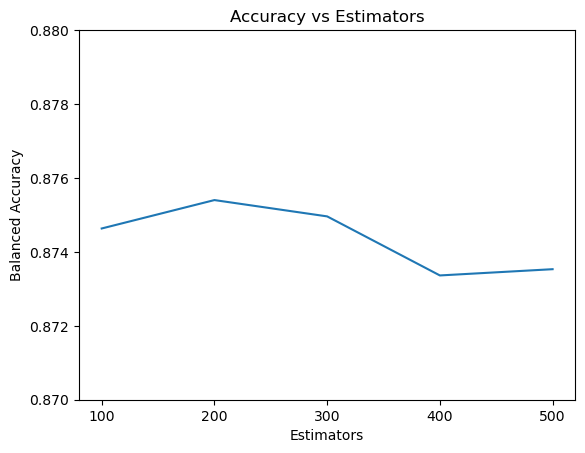

In [69]:
#Plot accuracy scores for each estimator value
import matplotlib.pyplot as plt
x_values = list(optimization_forest.keys())
y_values = list(optimization_forest.values())
xticks = x_values
plt.plot(x_values,y_values)
plt.ylabel('Balanced Accuracy')
plt.xlabel('Estimators')
plt.ylim(.87,.88)
plt.title('Accuracy vs Estimators')
plt.xticks(xticks)
plt.savefig('Optimization_Charts/Random_forest.png')
plt.show()


In [70]:
#Attempt 1 with 100 estimators
forest(100)

Estimators = 100

Balanced Accuracy Score: 0.8746330147179147
_________________________________________

Classification Report:
              precision    recall  f1-score   support

    Canceled       0.88      0.80      0.84      2958
Not_Canceled       0.91      0.95      0.93      6111

    accuracy                           0.90      9069
   macro avg       0.89      0.87      0.88      9069
weighted avg       0.90      0.90      0.90      9069

_________________________________________

Feature Importances
[(0.36269108135004713, 'lead_time'),
 (0.19427739000635996, 'avg_price_per_room'),
 (0.10514511032291696, 'no_of_special_requests'),
 (0.09735377052583781, 'arrival_month'),
 (0.062260719101205064, 'no_of_week_nights'),
 (0.04361705630286392, 'no_of_weekend_nights'),
 (0.027742209273378594, 'market_segment_type_Online'),
 (0.025082873490947316, 'no_of_adults'),
 (0.016047819989870944, 'market_segment_type_Offline'),
 (0.008526797887728534, 'type_of_meal_plan_Meal Plan 2')]
____

(                     Predicted Canceled  Predicted Not Canceled
 Actual Canceled                    2378                     580
 Actual Not Canceled                 334                    5777,
 0.8746330147179147,
 [(0.36269108135004713, 'lead_time'),
  (0.19427739000635996, 'avg_price_per_room'),
  (0.10514511032291696, 'no_of_special_requests'),
  (0.09735377052583781, 'arrival_month'),
  (0.062260719101205064, 'no_of_week_nights'),
  (0.04361705630286392, 'no_of_weekend_nights'),
  (0.027742209273378594, 'market_segment_type_Online'),
  (0.025082873490947316, 'no_of_adults'),
  (0.016047819989870944, 'market_segment_type_Offline'),
  (0.008526797887728534, 'type_of_meal_plan_Meal Plan 2'),
  (0.007735103148295128, 'no_of_children'),
  (0.0072439870739940595, 'type_of_meal_plan_Meal Plan 1'),
  (0.007110714518250218, 'required_car_parking_space'),
  (0.006441957554158434, 'room_type_reserved_Room_Type 1'),
  (0.006095823787962039, 'type_of_meal_plan_Not Selected'),
  (0.0057319613

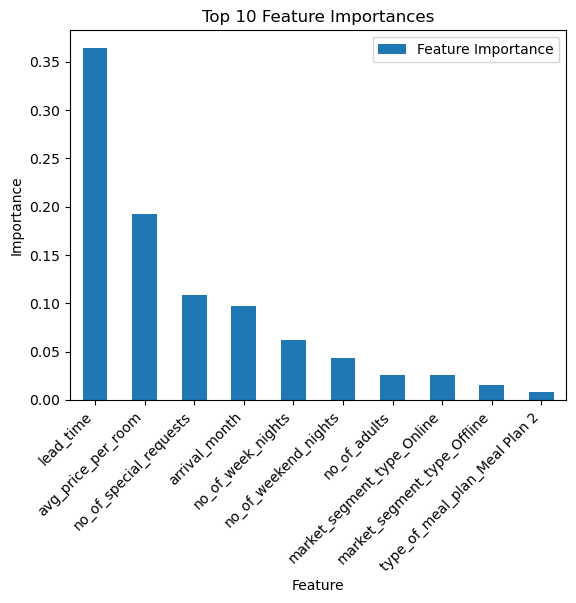

In [76]:
#Plot feature importances
importances_df = pd.DataFrame(importances_sorted[:10],columns=['Feature Importance','Feature'])
importances_df
importances_df.plot(kind='bar',x='Feature',y='Feature Importance',
                    title='Top 10 Feature Importances',ylabel='Importance',rot=45)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.savefig('Optimization_Charts/feature_importance.png',bbox_inches='tight')
plt.show()

In [72]:
#Attempt 2 with 200 estimators
forest(200)

Estimators = 200

Balanced Accuracy Score: 0.8754017544925305
_________________________________________

Classification Report:
              precision    recall  f1-score   support

    Canceled       0.88      0.81      0.84      2958
Not_Canceled       0.91      0.94      0.93      6111

    accuracy                           0.90      9069
   macro avg       0.89      0.88      0.88      9069
weighted avg       0.90      0.90      0.90      9069

_________________________________________

Feature Importances
[(0.36480765082969396, 'lead_time'),
 (0.19283828705952671, 'avg_price_per_room'),
 (0.1087649660075681, 'no_of_special_requests'),
 (0.09735445220355379, 'arrival_month'),
 (0.06230476441054452, 'no_of_week_nights'),
 (0.0433635058361651, 'no_of_weekend_nights'),
 (0.026080383280352316, 'market_segment_type_Online'),
 (0.025358162844603113, 'no_of_adults'),
 (0.015105007884655209, 'market_segment_type_Offline'),
 (0.007970263864541492, 'type_of_meal_plan_Meal Plan 2')]
_______

(                     Predicted Canceled  Predicted Not Canceled
 Actual Canceled                    2384                     574
 Actual Not Canceled                 337                    5774,
 0.8754017544925305,
 [(0.36480765082969396, 'lead_time'),
  (0.19283828705952671, 'avg_price_per_room'),
  (0.1087649660075681, 'no_of_special_requests'),
  (0.09735445220355379, 'arrival_month'),
  (0.06230476441054452, 'no_of_week_nights'),
  (0.0433635058361651, 'no_of_weekend_nights'),
  (0.026080383280352316, 'market_segment_type_Online'),
  (0.025358162844603113, 'no_of_adults'),
  (0.015105007884655209, 'market_segment_type_Offline'),
  (0.007970263864541492, 'type_of_meal_plan_Meal Plan 2'),
  (0.007669220004219135, 'no_of_children'),
  (0.007250584734662544, 'type_of_meal_plan_Meal Plan 1'),
  (0.007125040701870355, 'required_car_parking_space'),
  (0.006421742394643182, 'room_type_reserved_Room_Type 1'),
  (0.005672715596096973, 'type_of_meal_plan_Not Selected'),
  (0.00564231759730

In [73]:
#Attempt 3 with 300 estimators
forest(300)

Estimators = 300

Balanced Accuracy Score: 0.8749602933957088
_________________________________________

Classification Report:
              precision    recall  f1-score   support

    Canceled       0.88      0.80      0.84      2958
Not_Canceled       0.91      0.95      0.93      6111

    accuracy                           0.90      9069
   macro avg       0.89      0.87      0.88      9069
weighted avg       0.90      0.90      0.90      9069

_________________________________________

Feature Importances
[(0.3651592846286054, 'lead_time'),
 (0.19254901763986554, 'avg_price_per_room'),
 (0.10810623530707758, 'no_of_special_requests'),
 (0.09770115595316282, 'arrival_month'),
 (0.06223510094145491, 'no_of_week_nights'),
 (0.04309058694869141, 'no_of_weekend_nights'),
 (0.026468549254260634, 'market_segment_type_Online'),
 (0.02539703387410242, 'no_of_adults'),
 (0.014862898985344304, 'market_segment_type_Offline'),
 (0.00827674193886271, 'type_of_meal_plan_Meal Plan 2')]
________

(                     Predicted Canceled  Predicted Not Canceled
 Actual Canceled                    2378                     580
 Actual Not Canceled                 330                    5781,
 0.8749602933957088,
 [(0.3651592846286054, 'lead_time'),
  (0.19254901763986554, 'avg_price_per_room'),
  (0.10810623530707758, 'no_of_special_requests'),
  (0.09770115595316282, 'arrival_month'),
  (0.06223510094145491, 'no_of_week_nights'),
  (0.04309058694869141, 'no_of_weekend_nights'),
  (0.026468549254260634, 'market_segment_type_Online'),
  (0.02539703387410242, 'no_of_adults'),
  (0.014862898985344304, 'market_segment_type_Offline'),
  (0.00827674193886271, 'type_of_meal_plan_Meal Plan 2'),
  (0.007665787687704365, 'no_of_children'),
  (0.007262582508010872, 'type_of_meal_plan_Meal Plan 1'),
  (0.007122092373336451, 'required_car_parking_space'),
  (0.006491933726014352, 'room_type_reserved_Room_Type 1'),
  (0.0056437944170116775, 'room_type_reserved_Room_Type 4'),
  (0.00562205547685

In [74]:
#Attempt 4 with 400 estimators
forest(400)

Estimators = 400

Balanced Accuracy Score: 0.8733625693434146
_________________________________________

Classification Report:
              precision    recall  f1-score   support

    Canceled       0.88      0.80      0.84      2958
Not_Canceled       0.91      0.95      0.93      6111

    accuracy                           0.90      9069
   macro avg       0.89      0.87      0.88      9069
weighted avg       0.90      0.90      0.90      9069

_________________________________________

Feature Importances
[(0.36455510409423547, 'lead_time'),
 (0.19272567367632992, 'avg_price_per_room'),
 (0.10848992716995651, 'no_of_special_requests'),
 (0.09720414361634055, 'arrival_month'),
 (0.06206237142389029, 'no_of_week_nights'),
 (0.04328581724841892, 'no_of_weekend_nights'),
 (0.025790863491449, 'market_segment_type_Online'),
 (0.02570593076531668, 'no_of_adults'),
 (0.01534346027464098, 'market_segment_type_Offline'),
 (0.008316204942286968, 'type_of_meal_plan_Meal Plan 2')]
__________

(                     Predicted Canceled  Predicted Not Canceled
 Actual Canceled                    2370                     588
 Actual Not Canceled                 333                    5778,
 0.8733625693434146,
 [(0.36455510409423547, 'lead_time'),
  (0.19272567367632992, 'avg_price_per_room'),
  (0.10848992716995651, 'no_of_special_requests'),
  (0.09720414361634055, 'arrival_month'),
  (0.06206237142389029, 'no_of_week_nights'),
  (0.04328581724841892, 'no_of_weekend_nights'),
  (0.025790863491449, 'market_segment_type_Online'),
  (0.02570593076531668, 'no_of_adults'),
  (0.01534346027464098, 'market_segment_type_Offline'),
  (0.008316204942286968, 'type_of_meal_plan_Meal Plan 2'),
  (0.007636880239793548, 'no_of_children'),
  (0.007322456997122459, 'type_of_meal_plan_Meal Plan 1'),
  (0.007182717291554523, 'required_car_parking_space'),
  (0.006570373928262964, 'room_type_reserved_Room_Type 1'),
  (0.005638822430721662, 'room_type_reserved_Room_Type 4'),
  (0.00562982186703866

In [75]:
#Attempt 5 with 500 estimators
forest(500)

Estimators = 500

Balanced Accuracy Score: 0.8735316024739082
_________________________________________

Classification Report:
              precision    recall  f1-score   support

    Canceled       0.88      0.80      0.84      2958
Not_Canceled       0.91      0.95      0.93      6111

    accuracy                           0.90      9069
   macro avg       0.89      0.87      0.88      9069
weighted avg       0.90      0.90      0.90      9069

_________________________________________

Feature Importances
[(0.36442795707807973, 'lead_time'),
 (0.19274298915774934, 'avg_price_per_room'),
 (0.10812206250424476, 'no_of_special_requests'),
 (0.09711645620139915, 'arrival_month'),
 (0.06228198271765832, 'no_of_week_nights'),
 (0.04319718769954199, 'no_of_weekend_nights'),
 (0.025787995650744973, 'no_of_adults'),
 (0.025786464431208342, 'market_segment_type_Online'),
 (0.015778449783578535, 'market_segment_type_Offline'),
 (0.008591710300863132, 'type_of_meal_plan_Meal Plan 2')]
_____

(                     Predicted Canceled  Predicted Not Canceled
 Actual Canceled                    2371                     587
 Actual Not Canceled                 333                    5778,
 0.8735316024739082,
 [(0.36442795707807973, 'lead_time'),
  (0.19274298915774934, 'avg_price_per_room'),
  (0.10812206250424476, 'no_of_special_requests'),
  (0.09711645620139915, 'arrival_month'),
  (0.06228198271765832, 'no_of_week_nights'),
  (0.04319718769954199, 'no_of_weekend_nights'),
  (0.025787995650744973, 'no_of_adults'),
  (0.025786464431208342, 'market_segment_type_Online'),
  (0.015778449783578535, 'market_segment_type_Offline'),
  (0.008591710300863132, 'type_of_meal_plan_Meal Plan 2'),
  (0.007699087714658802, 'no_of_children'),
  (0.007273715070179929, 'type_of_meal_plan_Meal Plan 1'),
  (0.007160572631517971, 'required_car_parking_space'),
  (0.006547872744994528, 'room_type_reserved_Room_Type 1'),
  (0.005581730335876524, 'room_type_reserved_Room_Type 4'),
  (0.005508583024